In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_inactivity = pd.read_csv('data/insufficient_physical_activity.csv')
df_happiness = pd.read_csv('data/happiness_and_life_satisfaction.csv')

**PREPARING 'INSUFFICIENT PHYSICAL ACTIVITY' DATASET**

We have loaded the Insufficient Physical Activity Dataset in the variable df_inactivity. Before diving into the data, it would be valuable to know the number of datapoints we have and the overall size of the dataset. It is useful to look at the volume of data we are dealing with.

In [121]:
df_inactivity.shape

(156, 34)

In [122]:
df_inactivity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   IndicatorCode               156 non-null    object 
 1   Indicator                   156 non-null    object 
 2   ValueType                   156 non-null    object 
 3   ParentLocationCode          156 non-null    object 
 4   ParentLocation              156 non-null    object 
 5   Location type               156 non-null    object 
 6   SpatialDimValueCode         156 non-null    object 
 7   Location                    156 non-null    object 
 8   Period type                 156 non-null    object 
 9   Period                      156 non-null    int64  
 10  IsLatestYear                156 non-null    bool   
 11  Dim1 type                   156 non-null    object 
 12  Dim1                        156 non-null    object 
 13  Dim1ValueCode               156 non

From the info() output, we can make several observations:

Data types:
The dataset contains a mix of object (strings), float64, int64, and one bool column. This indicates that many variables are categorical (e.g., country, indicator type), while the numeric values are stored correctly as floats or integers.
Non-null values:
Several columns have 0 non-null values (e.g., Dim3, DataSource, FactValueTranslationID). These columns provide no useful information and will likely need to be removed during cleaning.
Fully populated columns:
Key columns such as Location, Period, FactValueNumeric, and its low/high ranges contain 156 non-null values, meaning they are complete and safe to work with.

In [123]:
cols_to_drop = ['Dim3 type','Dim3','Dim3ValueCode','DataSourceDimValueCode',
                'DataSource','FactValueNumericPrefix','FactValueUoM',
                'FactValueNumericLowPrefix','FactValueNumericHighPrefix',
                'FactValueTranslationID','FactComments']

df_inactivity.drop(columns=cols_to_drop, inplace=True)

In [124]:
print("\n-- Info after dropping empty columns --")
df_inactivity.info()


-- Info after dropping empty columns --
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   IndicatorCode         156 non-null    object 
 1   Indicator             156 non-null    object 
 2   ValueType             156 non-null    object 
 3   ParentLocationCode    156 non-null    object 
 4   ParentLocation        156 non-null    object 
 5   Location type         156 non-null    object 
 6   SpatialDimValueCode   156 non-null    object 
 7   Location              156 non-null    object 
 8   Period type           156 non-null    object 
 9   Period                156 non-null    int64  
 10  IsLatestYear          156 non-null    bool   
 11  Dim1 type             156 non-null    object 
 12  Dim1                  156 non-null    object 
 13  Dim1ValueCode         156 non-null    object 
 14  Dim2 type             156 non-nul

In [125]:
df_inactivity.head()

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,...,Dim1ValueCode,Dim2 type,Dim2,Dim2ValueCode,FactValueNumeric,FactValueNumericLow,FactValueNumericHigh,Value,Language,DateModified
0,NCD_PAA,Prevalence of insufficient physical activity a...,text,EUR,Europe,Country,NLD,Netherlands (Kingdom of the),Year,2022,...,SEX_FMLE,Age Group,18+ years,AGEGROUP_YEARS18-PLUS,10.71,6.66,15.73,10.7 [6.7-15.7],EN,2024-06-20T22:00:00.000Z
1,NCD_PAA,Prevalence of insufficient physical activity a...,text,EUR,Europe,Country,TKM,Turkmenistan,Year,2022,...,SEX_MLE,Age Group,18+ years,AGEGROUP_YEARS18-PLUS,10.82,4.53,19.54,10.8 [4.5-19.5],EN,2024-06-20T22:00:00.000Z
2,NCD_PAA,Prevalence of insufficient physical activity a...,text,EUR,Europe,Country,MDA,Republic of Moldova,Year,2022,...,SEX_BTSX,Age Group,18+ years,AGEGROUP_YEARS18-PLUS,10.77,6.91,15.69,10.8 [6.9-15.7],EN,2024-06-20T22:00:00.000Z
3,NCD_PAA,Prevalence of insufficient physical activity a...,text,EUR,Europe,Country,FIN,Finland,Year,2022,...,SEX_MLE,Age Group,18+ years,AGEGROUP_YEARS18-PLUS,11.06,6.16,17.50,11.1 [6.2-17.5],EN,2024-06-20T22:00:00.000Z
4,NCD_PAA,Prevalence of insufficient physical activity a...,text,EUR,Europe,Country,DNK,Denmark,Year,2022,...,SEX_FMLE,Age Group,18+ years,AGEGROUP_YEARS18-PLUS,11.21,6.00,18.48,11.2 [6.0-18.5],EN,2024-06-20T22:00:00.000Z


For the purposes of the upcoming analysis, not all variables in the original dataset are required. We therefore keep only the columns that contain essential information for our research question.

In [126]:
columns_to_keep = [
    'Location',
    'SpatialDimValueCode',
    'Period',
    'FactValueNumeric',
    'Dim1'
]

df_inactivity = df_inactivity[columns_to_keep]

In [127]:
## Calculates the number of missing values
df_inactivity.isnull().sum()

,0
Location,0
SpatialDimValueCode,0
Period,0
FactValueNumeric,0
Dim1,0


We rename the column names to more intuitive labels. This improves readability and simplifies the analysis process, especially when merging datasets later on.

In [128]:
df_inactivity = df_inactivity.rename(columns={
    'Location': 'Country',
    'SpatialDimValueCode': 'Code',
    'Period': 'Year',
    'FactValueNumeric': 'InsufficientActivity,%',
    'Dim1': 'Gender'
})

We convert the dataset from a long format (where each country appears three times: male, female, both) into a wide format. Using a pivot operation, we create separate columns for each gender category. This makes the dataset cleaner, easier to analyze, and ensures that each country-year combination appears only once.

In [129]:
df_inactivity.columns

Index(['Country', 'Code', 'Year', 'InsufficientActivity,%', 'Gender'], dtype='object')

In [130]:
df_inactivity = (
    df_inactivity.pivot_table(
        index=["Country", "Code", "Year"],
        columns="Gender",
        values="InsufficientActivity,%"
    )
    .reset_index()
)

df_inactivity = (
    df_inactivity.rename(columns={
        "Male": "Inactivity_Male",
        "Female": "Inactivity_Female",
        "Both sexes": "Inactivity_Both"
    })
    .rename_axis(None, axis=1)
)

df_inactivity.head()

,Country,Code,Year,Inactivity_Both,Inactivity_Female,Inactivity_Male
0,Albania,ALB,2022,24.28,27.12,21.44
1,Andorra,AND,2022,27.21,28.31,26.18
2,Armenia,ARM,2022,26.58,25.31,28.25
3,Austria,AUT,2022,19.76,19.88,19.62
4,Azerbaijan,AZE,2022,23.92,22.81,25.08


Now we calculate the actual level of physical activity by subtracting the value of inactivity from 100%. This new variable (Activity) allows us to analyze how the presence of physical activity (not its absence) relates to happiness indicators.

In [131]:
df_inactivity['Activity_Both'] = 100 - df_inactivity['Inactivity_Both']
df_inactivity['Activity_Female'] = 100 - df_inactivity['Inactivity_Female']
df_inactivity['Activity_Male']   = 100 - df_inactivity['Inactivity_Male']

**PREPARING 'HAPPINESS AND LIFE-SATISFACTION' DATASET**

We have loaded the Happiness and Life-Satisfaction Dataset in the variable df_happiness. Before diving into the data, it would be valuable to know the number of datapoints we have and the overall size of the dataset. It is useful to look at the volume of data we are dealing with.

In [132]:
df_happiness.shape

(34, 5)

Let us now move into the 4 columns of data. What does each of them exactly represent? The columns attribute will give us the name of the columns in the dataframe.

In [133]:
df_happiness.columns

Index(['Country', 'Code', 'Year', 'Cantril ladder score',
       'Happiness: Happy (aggregate)'],
      dtype='object')

Now its time to look at the data itself. Let's see what the first few rows (the first few datapoints) of our DataFrame look like:

In [134]:
df_happiness.head()

,Country,Code,Year,Cantril ladder score,Happiness: Happy (aggregate)
0,Albania,ALB,2022,5.277,73.92710
1,Austria,AUT,2022,7.097,89.06489
2,Bosnia and Herzegovina,BIH,2022,5.633,87.04503
3,Bulgaria,BGR,2022,5.466,60.17142
4,Croatia,HRV,2022,6.125,81.63215


Another way of looking at the data can be from the end(instead of the beginning).

In [135]:
df_happiness.tail()

,Country,Code,Year,Cantril ladder score,Happiness: Happy (aggregate)
29,Spain,ESP,2022,6.436,88.79475
30,Sweden,SWE,2022,7.395,93.77649
31,Switzerland,CHE,2022,7.240,93.31825
32,Ukraine,UKR,2022,5.071,76.26277
33,United Kingdom,GBR,2022,6.796,91.45046


df_happiness also contains a country code column, but it is not needed for the final analysis because the “Inactivity” dataset already provides a standardized country code.
To avoid duplicate identifiers during merging, we remove the code column from the Happiness dataset and keep the original code from the Inactivity dataset.

In [136]:
df_happiness = df_happiness.drop(columns=["Code"])

**CHECKING DATASET COMPATIBILITY BEFORE MERGING**

Before merging the two datasets, we need to verify whether they contain the same set of countries. This step ensures compatibility and helps us understand which countries will remain after merging. Using set intersection allows us to identify:
1) Countries present in both datasets (will remain after merge)
2) Countries present only in one dataset (will be dropped)
This is an important quality-check step before performing the actual merge.

In [137]:
common_countries = set(df_inactivity["Country"]).intersection(df_happiness["Country"])
print("Number of common countries:", len(common_countries))
common_countries

Number of common countries: 31


{'Albania',
 'Austria',
 'Bosnia and Herzegovina',
 'Bulgaria',
 'Croatia',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Estonia',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Hungary',
 'Iceland',
 'Italy',
 'Latvia',
 'Lithuania',
 'Montenegro',
 'North Macedonia',
 'Norway',
 'Poland',
 'Portugal',
 'Romania',
 'Serbia',
 'Slovakia',
 'Slovenia',
 'Spain',
 'Sweden',
 'Switzerland',
 'Ukraine'}

In [138]:
inactivity_only = set(df_inactivity["Country"]) - set(df_happiness["Country"])
print("Countries only in Inactivity dataset:", len(inactivity_only))
inactivity_only

Countries only in Inactivity dataset: 21


{'Andorra',
 'Armenia',
 'Azerbaijan',
 'Belarus',
 'Belgium',
 'Georgia',
 'Ireland',
 'Israel',
 'Kazakhstan',
 'Kyrgyzstan',
 'Luxembourg',
 'Malta',
 'Netherlands (Kingdom of the)',
 'Republic of Moldova',
 'Russian Federation',
 'San Marino',
 'Tajikistan',
 'Turkmenistan',
 'Türkiye',
 'United Kingdom of Great Britain and Northern Ireland',
 'Uzbekistan'}

In [139]:
happiness_only = set(df_happiness["Country"]) - set(df_inactivity["Country"])
print("Countries only in Happiness dataset:", len(happiness_only))
happiness_only

Countries only in Happiness dataset: 3


{'Netherlands', 'Russia', 'United Kingdom'}

In [140]:
rename_map = {
    "Netherlands (Kingdom of the)": "Netherlands",
    "Russian Federation": "Russia",
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom"
}

df_inactivity["Country"] = df_inactivity["Country"].replace(rename_map)

After renaming, we verify the common countries again to ensure full alignment between datasets.

In [141]:
common_countries = set(df_inactivity["Country"]).intersection(df_happiness["Country"])
print("Number of common countries:", len(common_countries))
common_countries

Number of common countries: 34


{'Albania',
 'Austria',
 'Bosnia and Herzegovina',
 'Bulgaria',
 'Croatia',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Estonia',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Hungary',
 'Iceland',
 'Italy',
 'Latvia',
 'Lithuania',
 'Montenegro',
 'Netherlands',
 'North Macedonia',
 'Norway',
 'Poland',
 'Portugal',
 'Romania',
 'Russia',
 'Serbia',
 'Slovakia',
 'Slovenia',
 'Spain',
 'Sweden',
 'Switzerland',
 'Ukraine',
 'United Kingdom'}

**MERGING THE CLEANED DATASETS**

Now that both datasets have been cleaned and their country labels aligned, we can merge them into a single combined dataset.

In [142]:
df_final = df_inactivity.merge(
    df_happiness,
    on=["Country", "Year"],
    how="inner"
)

df_final.head()

,Country,Code,Year,Inactivity_Both,Inactivity_Female,Inactivity_Male,Activity_Both,Activity_Female,Activity_Male,Cantril ladder score,Happiness: Happy (aggregate)
0,Albania,ALB,2022,24.28,27.12,21.44,75.72,72.88,78.56,5.277,73.92710
1,Austria,AUT,2022,19.76,19.88,19.62,80.24,80.12,80.38,7.097,89.06489
2,Bosnia and Herzegovina,BIH,2022,21.07,23.69,18.43,78.93,76.31,81.57,5.633,87.04503
3,Bulgaria,BGR,2022,32.28,32.13,32.45,67.72,67.87,67.55,5.466,60.17142
4,Croatia,HRV,2022,28.45,28.64,28.27,71.55,71.36,71.73,6.125,81.63215


In [143]:
df_final = df_final.drop(columns=[
    "Inactivity_Both",
    "Inactivity_Female",
    "Inactivity_Male"
])

To discover duplicates, we can use the df.duplicated() method.

In [144]:
print(df_final.duplicated())

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
dtype: bool


**EXPLORATORY DATA ANALYSIS (EDA)**

The DataFrame.describe() function provides us with a statistical summary of the numerical columns of a dataset.

In [145]:
df_final.drop(columns=["Year", ]).describe()

,Activity_Both,Activity_Female,Activity_Male,Cantril ladder score,Happiness: Happy (aggregate)
count,34.000000,34.000000,34.000000,34.000000,34.000000
mean,75.485000,74.133824,76.849412,6.447853,84.359076
std,10.756944,12.119286,9.565684,0.720204,7.686046
min,48.350000,43.060000,54.010000,5.071000,60.171420
25%,68.437500,67.995000,69.045000,5.986250,79.526285
50%,77.035000,75.910000,79.360000,6.445500,86.373590
75%,81.675000,81.487500,82.255000,6.880250,90.419247
max,91.300000,91.920000,91.930000,7.804000,95.114480


The corr() method calculates the relationship between each column in data set.

In [146]:
df_final.drop(columns=["Year"]).corr(numeric_only=True)

,Activity_Both,Activity_Female,Activity_Male,Cantril ladder score,Happiness: Happy (aggregate)
Activity_Both,1.000000,0.992918,0.988286,0.341251,0.226843
Activity_Female,0.992918,1.000000,0.963183,0.355336,0.181848
Activity_Male,0.988286,0.963183,1.000000,0.316552,0.281660
Cantril ladder score,0.341251,0.355336,0.316552,1.000000,0.595657
Happiness: Happy (aggregate),0.226843,0.181848,0.281660,0.595657,1.000000


Before exploring the role of physical activity, it is important to see
how the two dimensions of well-being relate to each other.
This scatter plot compares:
x - Cognitive happiness (Cantril Ladder)
y - Emotional happiness (Happy aggregate)

If countries align closely on a diagonal line, it means both types of well-being agree.
Countries that deviate from this line highlight cases where:
- people evaluate their life positively but do not feel emotionally happy, or
- feel emotionally happy despite a lower life evaluation.

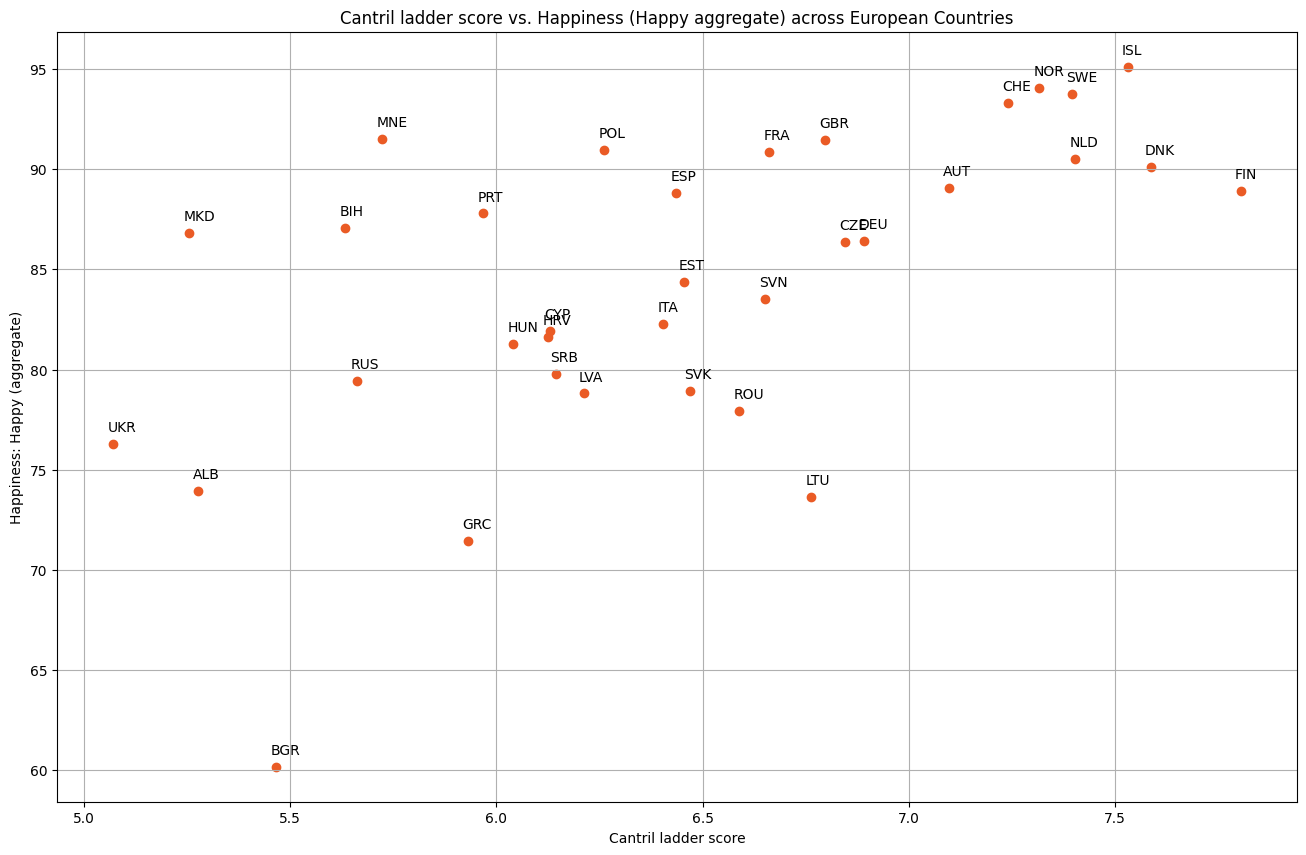

In [147]:
plt.figure(figsize=(16, 10))
plt.scatter(x="Cantril ladder score", y="Happiness: Happy (aggregate)", data=df_final, color='#EA5B25')
plt.xlabel("Cantril ladder score")
plt.ylabel("Happiness: Happy (aggregate)")
plt.title("Cantril ladder score vs. Happiness (Happy aggregate) across European Countries")
plt.grid(True)

for i, row in df_final.iterrows():
    plt.annotate(row['Code'], (row['Cantril ladder score'], row['Happiness: Happy (aggregate)']), textcoords="offset points", xytext=(-4,9), ha='left')

plt.show()

To identify countries where emotional happiness is high but cognitive life satisfaction is relatively low,
I identified a meaningful threshold directly from the distribution of points on the graph:
happiness > 80% (strong emotional positivity) and Cantril < 6.45 (below-average life satisfaction).
These countries represent a “happiness paradox”: people feel happy, but rate their lives lower.

In [148]:
col_cantril = "Cantril ladder score"
col_happy = "Happiness: Happy (aggregate)"

mask_custom = (df_final[col_happy] > 80) & (df_final[col_cantril] < 6.45)
paradox_countries = df_final[mask_custom].copy()

print("Countries with high emotional happiness but low Cantril scores:")
display(paradox_countries[["Country", col_cantril, col_happy]])

Countries with high emotional happiness but low Cantril scores:


,Country,Cantril ladder score,Happiness: Happy (aggregate)
2,Bosnia and Herzegovina,5.633,87.04503
4,Croatia,6.125,81.63215
5,Cyprus,6.130,81.93637
13,Hungary,6.041,81.28936
15,Italy,6.405,82.27991
18,Montenegro,5.722,91.52189
20,North Macedonia,5.254,86.81465
22,Poland,6.260,90.96447
23,Portugal,5.968,87.78766
29,Spain,6.436,88.79475


Let's see if physical activity can explain why people in these countries consider themselves happy despite not achieving high levels on the Cantril scale. To do this, we'll compare their activity levels with the European average.

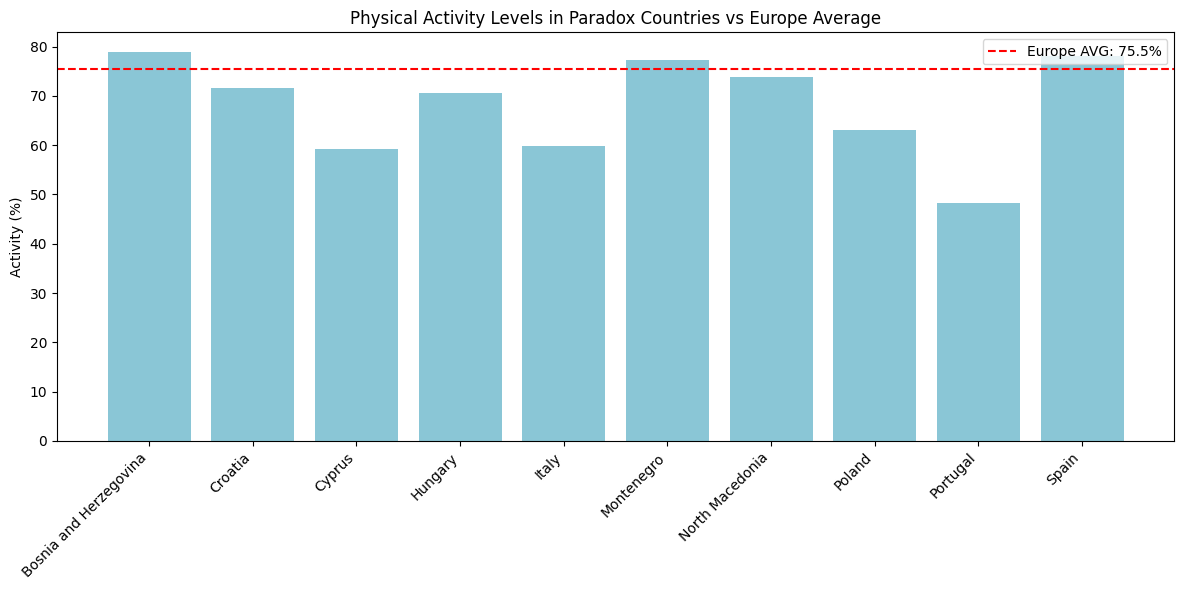

In [149]:
paradox = df_final.loc[[2,4,5,13,15,18,20,22,23,29]]

avg_activity = df_final["Activity_Both"].mean()

plt.figure(figsize=(12, 6))
plt.bar(paradox["Country"], paradox["Activity_Both"], color='#8AC6D6')
plt.axhline(avg_activity, color="red", linestyle="--", label=f"Europe AVG: {avg_activity:.1f}%")

plt.xticks(rotation=45, ha='right')
plt.title("Physical Activity Levels in Paradox Countries vs Europe Average")
plt.ylabel("Activity (%)")
plt.legend()
plt.tight_layout()
plt.show()

Now let's look at the opposite group — the countries that rank very high on both well-being dimensions. We select the top 10 countries on the Cantril scale (a measure of life satisfaction) and the top 10 countries on the Happy Aggregate scale (a measure of emotional happiness).

In [150]:
df_final.sort_values("Cantril ladder score", ascending=False).head(10)

,Country,Code,Year,Activity_Both,Activity_Female,Activity_Male,Cantril ladder score,Happiness: Happy (aggregate)
9,Finland,FIN,2022,90.42,91.92,88.94,7.804,88.91853
7,Denmark,DNK,2022,87.86,88.79,86.94,7.586,90.10067
14,Iceland,ISL,2022,74.08,71.97,76.08,7.530,95.11448
19,Netherlands,NLD,2022,90.59,89.29,91.93,7.403,90.52544
30,Sweden,SWE,2022,91.30,91.91,90.72,7.395,93.77649
21,Norway,NOR,2022,64.88,61.53,68.15,7.315,94.06306
31,Switzerland,CHE,2022,80.97,79.58,82.37,7.240,93.31825
1,Austria,AUT,2022,80.24,80.12,80.38,7.097,89.06489
11,Germany,DEU,2022,88.02,88.41,87.64,6.892,86.39900
6,Czechia,CZE,2022,76.63,75.88,77.40,6.845,86.34818


In [151]:
#Another way to look at the top ten values
df_final.nlargest(10, "Happiness: Happy (aggregate)")

,Country,Code,Year,Activity_Both,Activity_Female,Activity_Male,Cantril ladder score,Happiness: Happy (aggregate)
14,Iceland,ISL,2022,74.08,71.97,76.08,7.530,95.11448
21,Norway,NOR,2022,64.88,61.53,68.15,7.315,94.06306
30,Sweden,SWE,2022,91.30,91.91,90.72,7.395,93.77649
31,Switzerland,CHE,2022,80.97,79.58,82.37,7.240,93.31825
18,Montenegro,MNE,2022,77.25,76.09,78.43,5.722,91.52189
33,United Kingdom,GBR,2022,81.02,80.26,81.79,6.796,91.45046
22,Poland,POL,2022,63.03,62.05,64.05,6.260,90.96447
10,France,FRA,2022,76.82,73.69,80.15,6.661,90.87823
19,Netherlands,NLD,2022,90.59,89.29,91.93,7.403,90.52544
7,Denmark,DNK,2022,87.86,88.79,86.94,7.586,90.10067


The Venn diagram shows the overlap between the 10 happiest countries on Cantril's ladder and emotional happiness. We find the leaders — countries that appear on both lists.

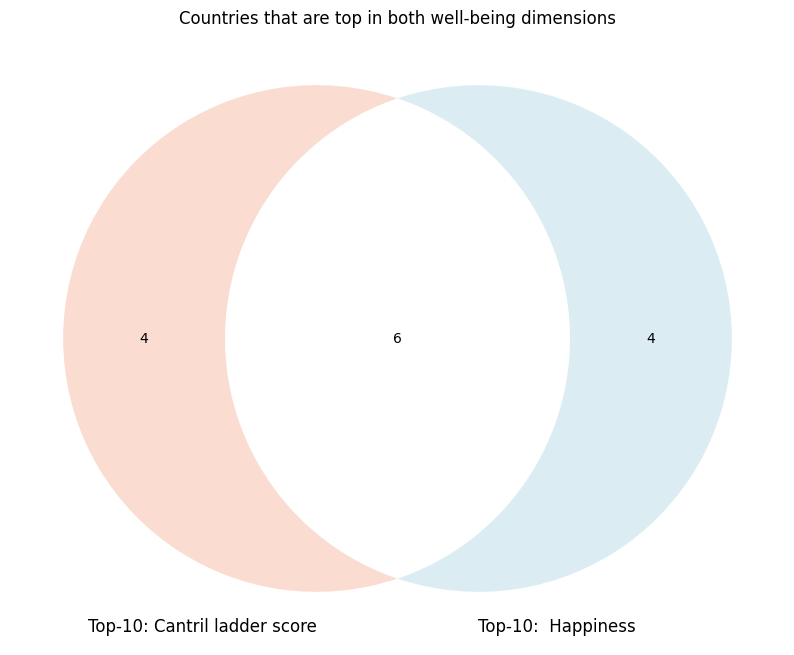

Top-10 Cantril ladder score: Finland, Denmark, Iceland, Netherlands, Sweden, Norway, Switzerland, Austria, Germany, Czechia
Top-10 Happiness: Iceland, Norway, Sweden, Switzerland, Montenegro, United Kingdom, Poland, France, Netherlands, Denmark
Countries in both lists (intersection): Denmark , Iceland , Netherlands , Norway , Sweden , Switzerland


In [152]:
from matplotlib_venn import venn2


top10_cantril_df = df_final.sort_values("Cantril ladder score", ascending=False).head(10)
top10_happy_df   = df_final.nlargest(10, "Happiness: Happy (aggregate)")

# Create sets of country names from these dataframes
set_cantril = set(top10_cantril_df['Country'])
set_happy   = set(top10_happy_df['Country'])

subsets_for_venn = (len(set_cantril - set_happy), len(set_happy - set_cantril), len(set_cantril & set_happy))

plt.figure(figsize=(10, 8))
v = venn2(subsets_for_venn,
          set_labels=("Top-10: Cantril ladder score", "Top-10:  Happiness"),
          set_colors=('#F9CEBE', '#CDE6EE'),
          alpha=0.7
         )
plt.title("Countries that are top in both well-being dimensions")

intersection = set_cantril & set_happy
only_cantril = set_cantril - set_happy
only_happy = set_happy - set_cantril

plt.show()

print("Top-10 Cantril ladder score:", ", ".join(top10_cantril_df['Country']))
print("Top-10 Happiness:", ", ".join(top10_happy_df['Country']))

print("Countries in both lists (intersection):", " , ".join(sorted(list(intersection))))

Let's repeat the same approach as for the Paradox countries: we will compare their levels of physical activity with the European average.

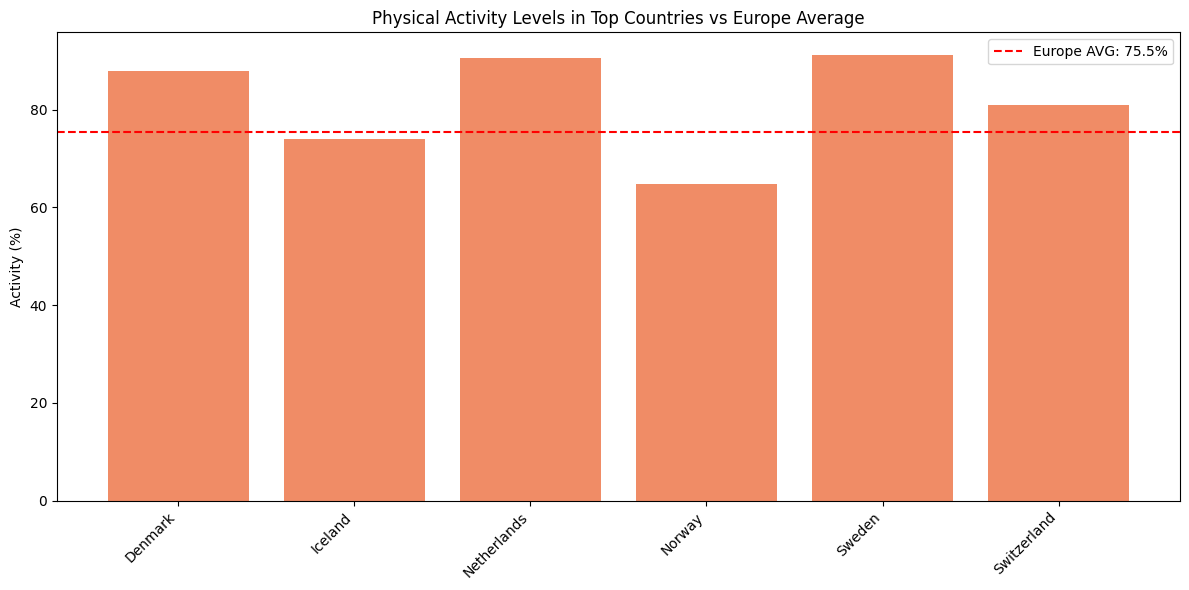

In [153]:
top_countries_list = ['Denmark', 'Iceland', 'Netherlands', 'Norway', 'Sweden', 'Switzerland']
top_countries = df_final[df_final['Country'].isin(top_countries_list)].copy()

avg_activity = df_final["Activity_Both"].mean()

plt.figure(figsize=(12, 6))
plt.bar(top_countries["Country"], top_countries["Activity_Both"], color='#F08C66')
plt.axhline(avg_activity, color="red", linestyle="--", label=f"Europe AVG: {avg_activity:.1f}%")

plt.xticks(rotation=45, ha='right')
plt.title("Physical Activity Levels in Top Countries vs Europe Average")
plt.ylabel("Activity (%)")
plt.legend()
plt.tight_layout()
plt.show()

Summary of Both Analyses: When we compare both groups, the story becomes clearer.
Physical activity alone cannot explain either the paradox or the success of the leaders.
Paradoxical countries are happier emotionally because of cultural and social factors.
Well-Being Leaders score high in both metrics because they combine emotional happiness with strong economic and social conditions.